# Rawdata preprocessing

In [1]:
import pandas as pd
import numpy as np


filename = 'fashion20000_rawdata.json'

df = pd.read_json(filename)
#df.head()

In [2]:
base_df = df[['id','username','hashtags']]
#base_df.head()
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19631 entries, 0 to 19630
Data columns (total 3 columns):
id          19631 non-null object
username    19631 non-null object
hashtags    19631 non-null object
dtypes: object(3)
memory usage: 460.2+ KB


In [3]:
# user 1명당 hashtag 1개씩만 사용하도록 합니다. (광고성 게시물이 특정 태그의 갯수를 늘리기 때문에)
groupby_df = base_df.groupby('username').agg({'hashtags' : 'sum'})
groupby_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11253 entries,  to zxed_umpq
Data columns (total 1 columns):
hashtags    11253 non-null object
dtypes: object(1)
memory usage: 175.8+ KB


In [4]:
groupby_df.head()

,hashtags
username,
,"[ktmboy, modellife, wanderlust, ktmlife, biker..."
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0hsehoe,[]


In [5]:
# 잘못된 데이터들을 처리해줍니다.
fashion_df = groupby_df[groupby_df.astype(str)['hashtags'] != '[]']
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9963 entries,  to zxed_umpq
Data columns (total 1 columns):
hashtags    9963 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


In [6]:
fashion_df.head()

,hashtags
username,
,"[ktmboy, modellife, wanderlust, ktmlife, biker..."
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0portraits0,"[fashionstyle, fashionpost, fashionista, fashi..."


In [7]:
fashion_df = fashion_df[1:]
fashion_df.head()

,hashtags
username,
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0portraits0,"[fashionstyle, fashionpost, fashionista, fashi..."
0ption,"[fashiondesigner, fashionlover, bmorefashion, ..."


In [8]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


In [9]:
# 태그가 몇번 나왔는지 세어주는 함수입니다.
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

sort_dict = getTagsDict(fashion_df)

In [10]:
sort_dict[-10:]

[('fashiondesigner', 3400),
 ('fashionstyle', 3721),
 ('fashionable', 3836),
 ('model', 3945),
 ('fashionista', 4760),
 ('style', 5697),
 ('fashionblogger', 5804),
 ('fashionweek', 7274),
 ('fashionshow', 10019),
 ('fashion', 10600)]

In [11]:
# 중복을 제거해줍니다. (한 글에 동일한 태그 여러 번)

tag_df = fashion_df['hashtags']

for i in range(len(tag_df)):
#     if "fashion" in tag_df[i] == False:
#         print(tag_df[i])
    tag_df[i] = list(set(tag_df[i]))

fashion_df['hashtags'] = tag_df


In [12]:
fashion_dict = getTagsDict(fashion_df)
print(fashion_dict[-10:])
print(fashion_df.info())

[('instagood', 1823), ('fashionstyle', 1830), ('fashionable', 2014), ('model', 2169), ('fashionista', 2399), ('fashionblogger', 2978), ('style', 3152), ('fashionweek', 4102), ('fashionshow', 5349), ('fashion', 6460)]
<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 475.7+ KB
None


In [13]:
fashion_dict[-30:]

[('streetstyle', 861),
 ('instastyle', 868),
 ('photography', 918),
 ('fashionaddict', 962),
 ('fashiondesign', 981),
 ('fashiondaily', 989),
 ('styleblogger', 1084),
 ('fashionlover', 1084),
 ('fashionphotography', 1085),
 ('ootd', 1200),
 ('photooftheday', 1211),
 ('fashionpost', 1230),
 ('beautiful', 1247),
 ('beauty', 1251),
 ('fashionblog', 1310),
 ('fashiongram', 1326),
 ('love', 1405),
 ('fashiondiaries', 1413),
 ('instafashion', 1495),
 ('fashiondesigner', 1654),
 ('instagood', 1823),
 ('fashionstyle', 1830),
 ('fashionable', 2014),
 ('model', 2169),
 ('fashionista', 2399),
 ('fashionblogger', 2978),
 ('style', 3152),
 ('fashionweek', 4102),
 ('fashionshow', 5349),
 ('fashion', 6460)]

In [14]:
len(fashion_dict)
# 태그의 종류가 5만개입니다.

50297

In [15]:
fashion_dict = fashion_dict[-100:]
# 가장 빈도수가 높은 태그 100개만 얻어냅니다.

In [16]:
print(len(fashion_dict))

100


In [17]:
tag_list = []
for i in fashion_dict:
    tag_list.append(i[0])

print(tag_list)
print(len(tag_list))

['womensfashion', 'tbt', 'fashionlovers', 'fashionphotographer', 'cool', 'shopping', 'instagramanet', 'parisfashionweek', 'photographer', 'menswear', 'instatag', 'classy', 'clothes', 'lookbook', 'fashionillustration', 'like4like', 'couture', 'pfw', 'nails', 'instalike', 'luxury', 'hairstyle', 'happy', 'catwalk', 'tagblender', 'photoshoot', 'instadaily', 'accessories', 'winter', 'photo', 'girls', 'lifestyle', 'streetwear', 'fashionistas', 'hautecouture', 'streetfashion', 'swag', 'me', 'followme', 'fashions', 'models', 'dress', 'instagram', 'blogger', 'fashionstylist', 'designer', 'follow', 'fashionmodel', 'design', 'fashiongirl', 'styleblog', 'styleoftheday', 'girl', 'picoftheday', 'shoes', 'pretty', 'stylish', 'styles', 'hair', 'outfit', 'look', 'outfitoftheday', 'mensfashion', 'art', 'paris', 'moda', 'modeling', 'runway', 'makeup', 'cute', 'streetstyle', 'instastyle', 'photography', 'fashionaddict', 'fashiondesign', 'fashiondaily', 'styleblogger', 'fashionlover', 'fashionphotography',

# Affinity Matrix

In [18]:
# Affinity Matrix를 만들기 위힌 dataFrame을 만드는 함수입니다.

def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(index = np.arange(0,len(df)),columns=taglist)    
    
    zero_list = list()
    for i in range(len(taglist)):
        zero_list.append(0)
    
    i = 0
    for index,row in df.iterrows():
        
        tmp_df = df.loc[index]
        tmp_list = zero_list.copy()
        
        hashlist = tmp_df['hashtags']
        
        for tag in hashlist:
            if tag in taglist:
                tagindex = taglist.index(tag)
                tmp_list[tagindex] = 1
        
        result_df.loc[i] = tmp_list
        i += 1
    
    return result_df
        

In [19]:
before_corr = get_DataFrame_for_affinity(fashion_df,tag_list)

In [20]:
before_corr

,womensfashion,tbt,fashionlovers,fashionphotographer,cool,shopping,instagramanet,parisfashionweek,photographer,menswear,...,instagood,fashionstyle,fashionable,model,fashionista,fashionblogger,style,fashionweek,fashionshow,fashion
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [166]:
corr_affinity = before_corr.corr(method = 'pearson')

TypeError: corr() got an unexpected keyword argument 'round'

In [22]:
corr_affinity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, womensfashion to fashion
Data columns (total 100 columns):
womensfashion          100 non-null float64
tbt                    100 non-null float64
fashionlovers          100 non-null float64
fashionphotographer    100 non-null float64
cool                   100 non-null float64
shopping               100 non-null float64
instagramanet          100 non-null float64
parisfashionweek       100 non-null float64
photographer           100 non-null float64
menswear               100 non-null float64
instatag               100 non-null float64
classy                 100 non-null float64
clothes                100 non-null float64
lookbook               100 non-null float64
fashionillustration    100 non-null float64
like4like              100 non-null float64
couture                100 non-null float64
pfw                    100 non-null float64
nails                  100 non-null float64
instalike              100 non-null float64
lux

In [23]:
corr_affinity['fashionweek'].sort_values(ascending =False)

fashionweek           1.000000
fashionblogger        0.443652
fashionable           0.434068
fashionista           0.403167
fashiondiaries        0.393550
fashionstyle          0.373689
fashionblog           0.362479
fashionpost           0.340087
fashiongram           0.338650
fashiondesigner       0.314595
fashiondaily          0.312230
fashionlover          0.301714
styleblogger          0.282065
fashionphotography    0.269242
fashiondesign         0.267013
fashionaddict         0.261635
styleblog             0.254659
instastyle            0.247039
instafashion          0.244667
style                 0.231614
styleoftheday         0.224070
fashiongirl           0.220944
streetstyle           0.197776
styles                0.193653
tagblender            0.193627
fashions              0.185389
instatag              0.183390
instagramanet         0.182814
outfitoftheday        0.177358
fashionstylist        0.174414
                        ...   
menswear              0.037732
luxury  

In [24]:
corr_affinity

,womensfashion,tbt,fashionlovers,fashionphotographer,cool,shopping,instagramanet,parisfashionweek,photographer,menswear,...,instagood,fashionstyle,fashionable,model,fashionista,fashionblogger,style,fashionweek,fashionshow,fashion
womensfashion,1.000000,-0.015699,-0.002261,-0.009542,-0.023519,0.011304,-0.030664,0.010949,-0.003508,0.016505,...,-0.049121,0.182707,0.026516,-0.047477,0.163438,0.156919,0.074556,0.111276,-0.041618,0.068063
tbt,-0.015699,1.000000,-0.030513,-0.023717,0.000620,-0.009896,-0.003146,-0.027425,0.003033,-0.014467,...,0.179985,-0.066895,-0.059119,-0.000518,-0.060055,-0.062489,-0.016756,-0.057924,-0.089958,0.047814
fashionlovers,-0.002261,-0.030513,1.000000,0.253698,-0.017377,-0.024304,-0.031261,-0.007447,-0.011364,-0.015131,...,-0.061949,0.253828,0.204424,-0.068568,0.066039,0.054769,-0.058954,0.126570,0.070148,-0.060243
fashionphotographer,-0.009542,-0.023717,0.253698,1.000000,-0.017604,-0.024498,-0.031423,-0.000938,0.045518,-0.008706,...,-0.068538,0.220020,0.170482,-0.009581,0.097594,0.081494,-0.053570,0.122111,0.089053,-0.020645
cool,-0.023519,0.000620,-0.017377,-0.017604,1.000000,0.013005,-0.031423,-0.014510,-0.004902,0.007972,...,0.020798,-0.040031,0.091761,0.137958,0.078424,0.069984,0.132746,0.049544,0.010384,-0.039039
shopping,0.011304,-0.009896,-0.024304,-0.024498,0.013005,1.000000,-0.028083,-0.014591,-0.028491,0.024505,...,0.055258,-0.032697,-0.035305,0.026952,-0.009524,-0.009676,0.090659,-0.031789,-0.096939,0.077761
instagramanet,-0.030664,-0.003146,-0.031261,-0.031423,-0.031423,-0.028083,1.000000,-0.031637,-0.031955,-0.032219,...,0.270024,0.318955,0.313871,-0.085286,0.281476,0.241609,0.223635,0.182814,0.131150,0.122306
parisfashionweek,0.010949,-0.027425,-0.007447,-0.000938,-0.014510,-0.014591,-0.031637,1.000000,-0.008629,0.077102,...,-0.061682,-0.039378,-0.056295,-0.000880,-0.051280,-0.023477,-0.031046,0.088655,0.018313,-0.029767
photographer,-0.003508,0.003033,-0.011364,0.045518,-0.004902,-0.028491,-0.031955,-0.008629,1.000000,-0.016181,...,0.007311,-0.034697,-0.053204,0.116001,-0.047356,0.008475,0.009024,-0.012261,-0.027190,0.061173
menswear,0.016505,-0.014467,-0.015131,-0.008706,0.007972,0.024505,-0.032219,0.077102,-0.016181,1.000000,...,-0.022200,-0.021019,-0.028604,0.004130,-0.036566,-0.000953,0.054968,0.037732,0.003200,-0.006664


In [124]:
corr_affinity = corr_affinity(astype = float)

TypeError: 'DataFrame' object is not callable

In [151]:
inf = np.isnan(corr_affinity)

In [152]:
type(inf)

pandas.core.frame.DataFrame

In [178]:
print(np.isinf(corr_affinity).sum().sum())

0


# max_values

In [25]:
max_values = []
for tag in tag_list:
    
    series = corr_affinity[tag].sort_values(ascending = False)
    max_value = [series[1],series[2],series[3],series[4],series[5]]
    max_list = []
    for i in range(5):
        max_list.append(series[series == max_value[i]].index[0])
    max_values.append(max_list)

In [26]:
print(max_values[0][0])


streetfashion


In [27]:
len(max_values)

100

In [28]:
len(max_values[0])

5

# Clustering

In [172]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

sc = SpectralClustering(affinity='precomputed')
km = KMeans()


In [169]:
gfewfew = sc.fit_predict(before_corr)

In [161]:
print(sc.affinity_matrix_)
aaa = sc.affinity_matrix_

[[1.00000000e+00 1.18195131e-02 2.30189316e-02 ... 2.35653770e-02
  1.78677096e-02 5.52882643e-02]
 [1.18195131e-02 1.00000000e+00 5.03633564e-03 ... 6.45427196e-04
  2.68498504e-03 3.93655720e-02]
 [2.30189316e-02 5.03633564e-03 1.00000000e+00 ... 3.28343907e-02
  6.94210998e-02 1.35743198e-02]
 ...
 [2.35653770e-02 6.45427196e-04 3.28343907e-02 ... 1.00000000e+00
  3.15172299e-02 8.63932912e-03]
 [1.78677096e-02 2.68498504e-03 6.94210998e-02 ... 3.15172299e-02
  1.00000000e+00 5.62745558e-03]
 [5.52882643e-02 3.93655720e-02 1.35743198e-02 ... 8.63932912e-03
  5.62745558e-03 1.00000000e+00]]


In [173]:
prrr = pd.DataFrame(sc.fit_predict(corr_affinity))

ValueError: array must not contain infs or NaNs

In [93]:
sc.fit(corr_affinity)
km.fit(corr_affinity)
predict = pd.DataFrame(sc.fit_predict(corr_affinity))
predict.columns = ['predict']
predict.head()

KeyboardInterrupt: 

In [92]:
sc.affinity

'rbf'

In [76]:
print(before_corr[:30].any() == False)

womensfashion           True
tbt                    False
fashionlovers          False
fashionphotographer    False
cool                    True
shopping                True
instagramanet          False
parisfashionweek       False
photographer            True
menswear                True
instatag               False
classy                 False
clothes                 True
lookbook                True
fashionillustration    False
like4like              False
couture                 True
pfw                     True
nails                  False
instalike              False
luxury                  True
hairstyle              False
happy                  False
catwalk                 True
tagblender             False
photoshoot              True
instadaily              True
accessories            False
winter                 False
photo                   True
                       ...  
streetstyle            False
instastyle             False
photography            False
fashionaddict 

In [40]:
testpredict

,0
0,4
1,1
2,2
3,2
4,0
5,0
6,6
7,0
8,0
9,0


# Build Node

In [31]:
node_df = pd.DataFrame(fashion_dict, columns=['Tag','Freq'])

In [32]:
node_df

,Tag,Freq
0,womensfashion,288
1,tbt,291
2,fashionlovers,299
3,fashionphotographer,302
4,cool,302
5,shopping,303
6,instagramanet,305
7,parisfashionweek,306
8,photographer,312
9,menswear,317


In [41]:
node_df['Group'] = testpredict
node_df

,Tag,Freq,Group
0,womensfashion,288,4
1,tbt,291,1
2,fashionlovers,299,2
3,fashionphotographer,302,2
4,cool,302,0
5,shopping,303,0
6,instagramanet,305,6
7,parisfashionweek,306,0
8,photographer,312,0
9,menswear,317,0


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

tag : womensfashion i,j 0 0
tag : womensfashion i,j 0 1
tag : womensfashion i,j 0 2
tag : womensfashion i,j 0 3
tag : tbt i,j 1 0
tag : tbt i,j 1 1
tag : tbt i,j 1 2
tag : tbt i,j 1 3
tag : fashionlovers i,j 2 0
tag : fashionlovers i,j 2 1
tag : fashionlovers i,j 2 2
tag : fashionlovers i,j 2 3
tag : fashionphotographer i,j 3 0
tag : fashionphotographer i,j 3 1
tag : fashionphotographer i,j 3 2
tag : fashionphotographer i,j 3 3
tag : cool i,j 4 0
tag : cool i,j 4 1
tag : cool i,j 4 2
tag : cool i,j 4 3
tag : shopping i,j 5 0
tag : shopping i,j 5 1
tag : shopping i,j 5 2
tag : shopping i,j 5 3
tag : instagramanet i,j 6 0
tag : instagramanet i,j 6 1
tag : instagramanet i,j 6 2
tag : instagramanet i,j 6 3
tag : parisfashionweek i,j 7 0
tag : parisfashionweek i,j 7 1
tag : parisfashionweek i,j 7 2
tag : parisfashionweek i,j 7 3
tag : photographer i,j 8 0
tag : photographer i,j 8 1
tag : photographer i,j 8 2
tag : photographer i,j 8 3
tag : menswear i,j 9 0
tag : menswear i,j 9 1
tag : mens

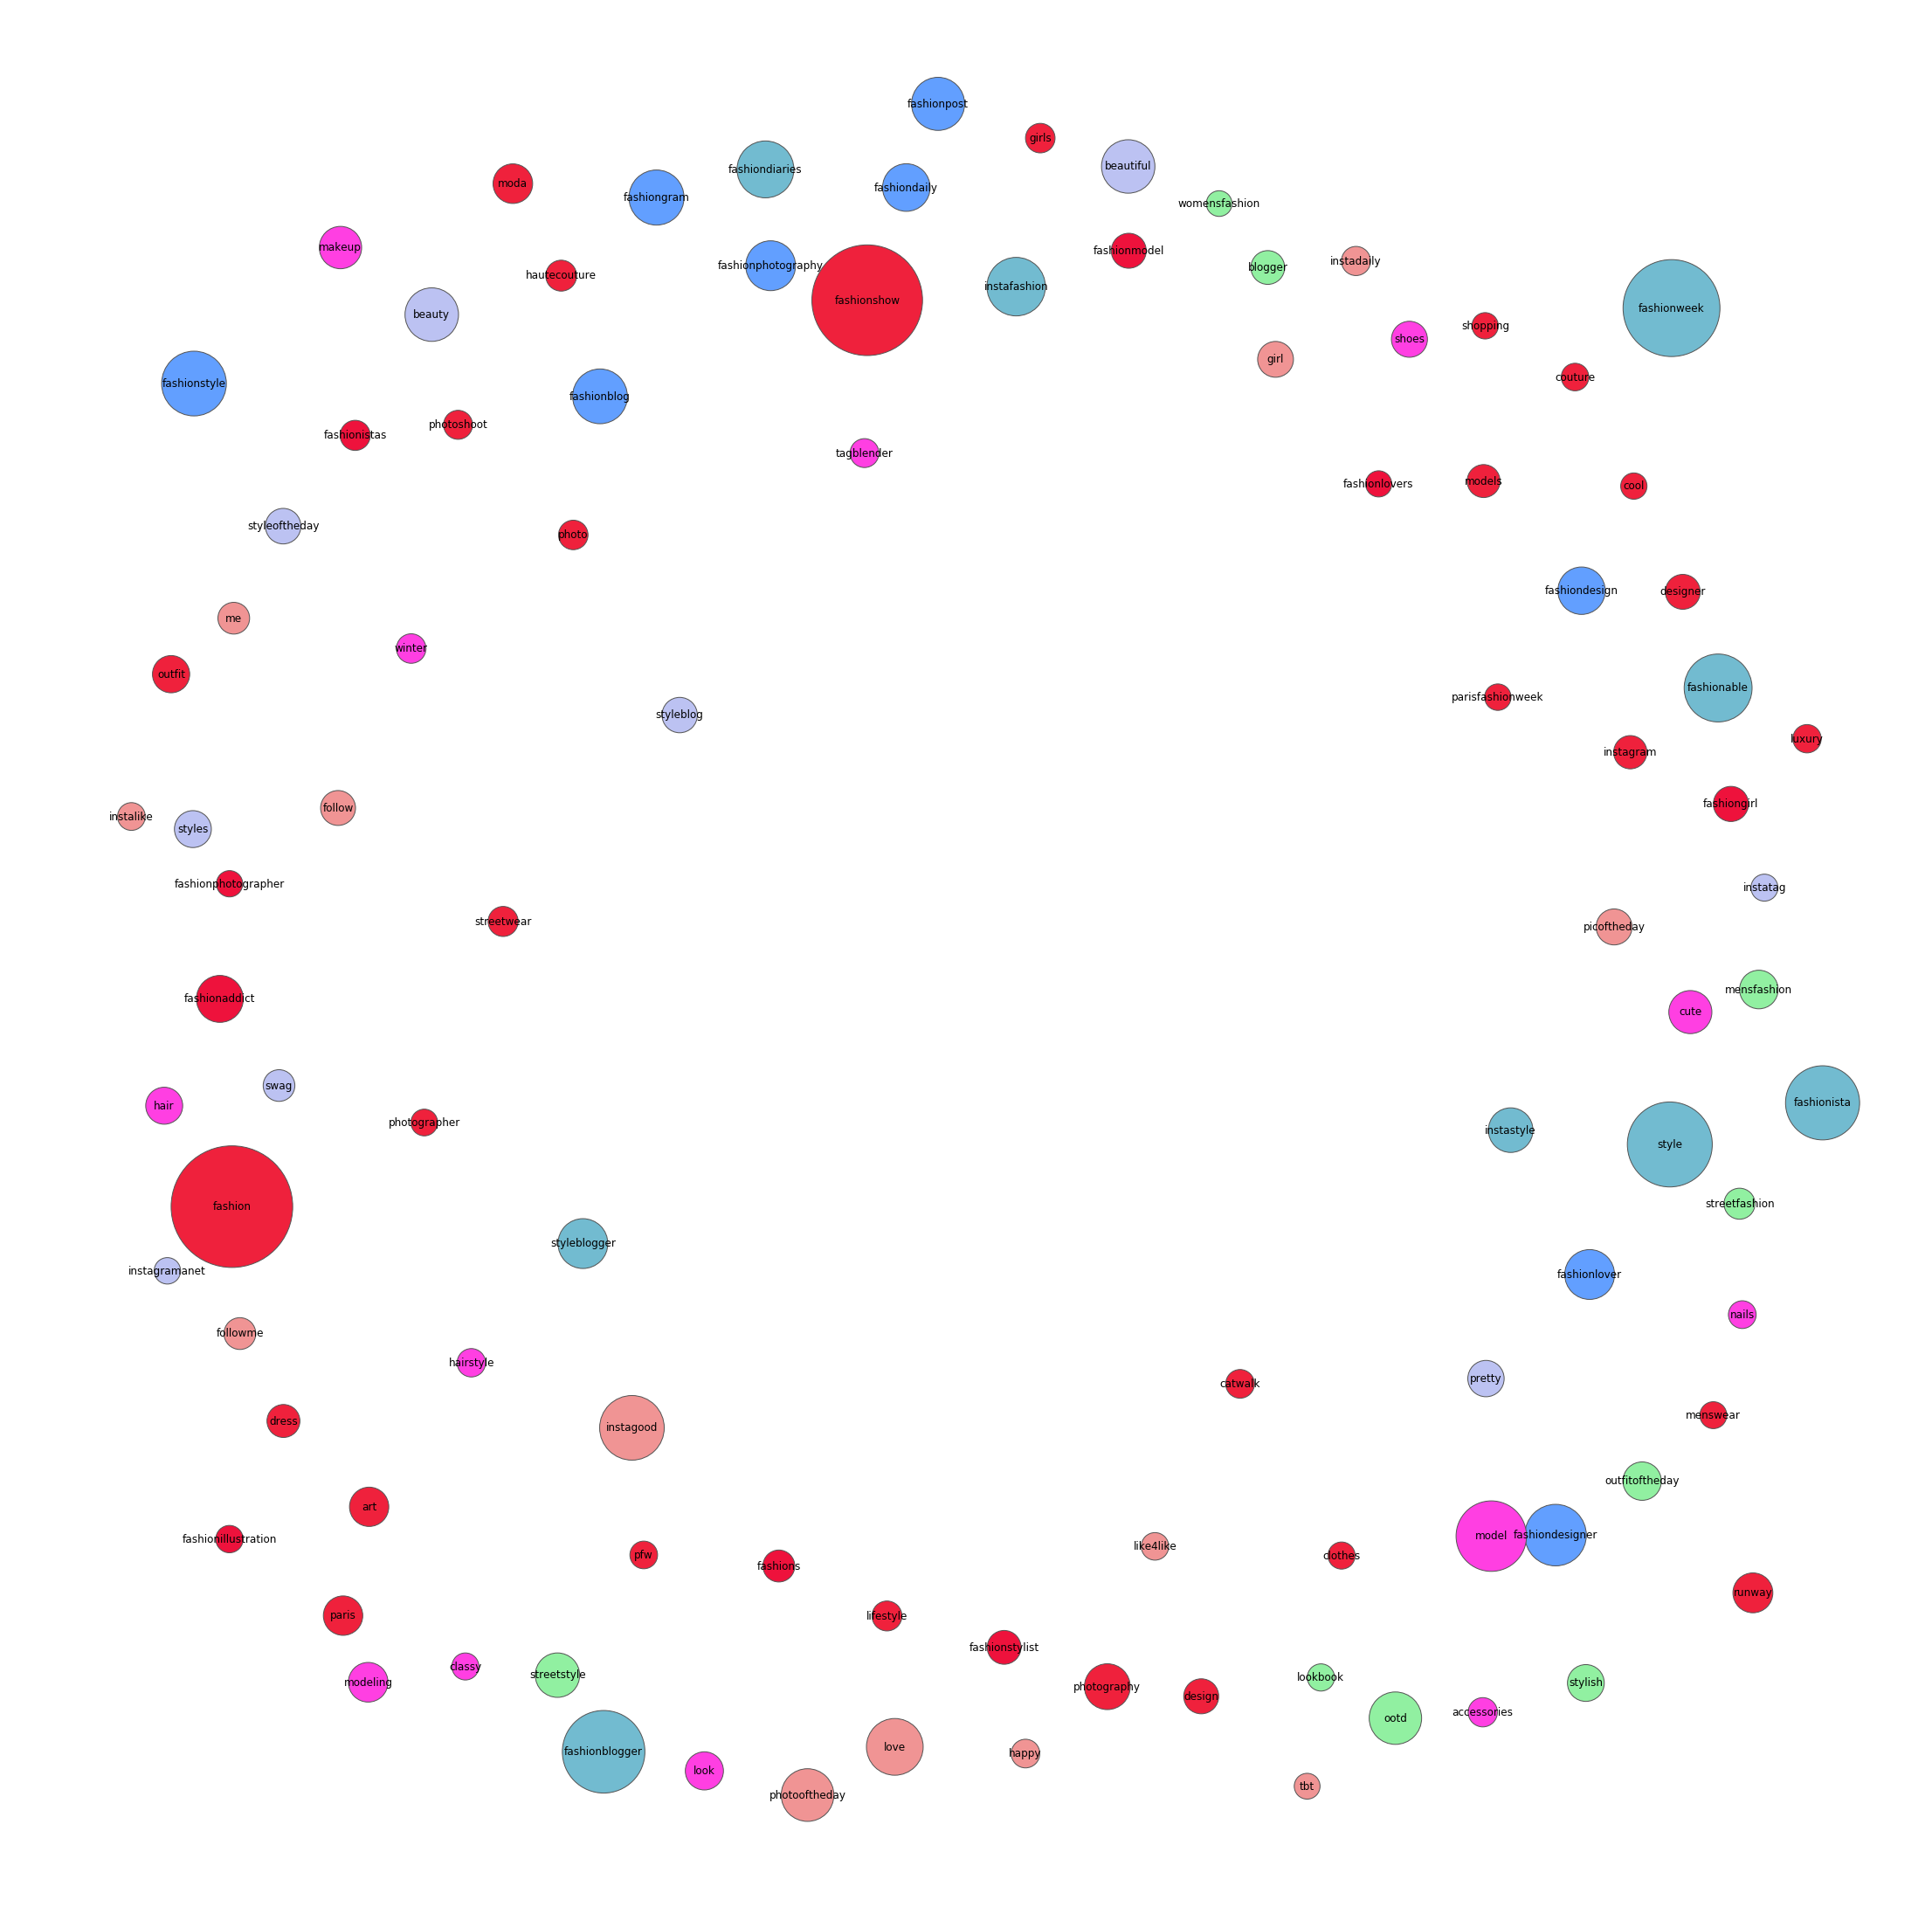

In [163]:
G = nx.Graph(day = "Stackoverflow")

for index,row in node_df.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    

# #     
# for index1,row1 in node_df.iterrows():
#     for index2,row2 in node_df.iterrows():
#         if row1['Tag'] == row2['Tag']:
#             continue
#         if corr_affinity[row1['Tag']][row2['Tag']] > -1:
#             G.add_edge(row1['Tag'],row2['Tag'],weight = corr_affinity[row1['Tag']][row2['Tag']]*3)


## corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
i = 0
for index1,row1 in node_df.iterrows():
    for j in range(4):
        try:
            G.add_edge(row1['Tag'],max_values[i][j],weight = aaa[tag_list.find(row1['Tag'])][max_values[i][j]]*5 )
        except:
            print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
    
    i += 1

color_map = {1:'#f09494', 2:'#ee123c', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#FF3FE2', 0:'#ef213c', 8:'#9B62FF', 9:'#17A7FF', 10:'#FFA925', 11:'#5D484B'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('Hash_Network_Graph_image/fashion20000_top100_Spectral_maxvalues_3')